In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import seaborn as sns

In [2]:
from scipy import stats

In [4]:
# used below code to concatenate two csv files 
path = r'/home/aydin/Desktop/dsi_lax3/capstones/capstone1/Tracking-the-Sun/data'#path to the files
all_files = glob.glob(os.path.join(path, "*.csv")) 
df_from_each_file = (pd.read_csv(f, engine = 'python') for f in all_files)
df = pd.concat(df_from_each_file, ignore_index=True)

In [39]:
df.shape

(1543831, 60)

In [40]:
df.head()

,Data Provider,System ID (from first Data Provider),"System ID (from second Data Provider, if applicable)",System ID (Tracking the Sun),Installation Date,System Size,Total Installed Price,Appraised Value Flag,Sales Tax Cost,Rebate or Grant,...,Inverter Manufacturer #3,Inverter Model #1,Inverter Model #2,Inverter Model #3,Microinverter #1,Microinverter #2,Microinverter #3,System Inverter Capacity,DC Optimizer,Inverter Loading Ratio
0,Arkansas State Energy Office,-9999,-9999,AR_y4H4nGRh77,4/29/2010,2.016,14558.0,False,510.762764,0.0,...,-9999,-9999,-9999,-9999,1,-9999,-9999,1.71,0,1.178947
1,Arkansas State Energy Office,-9999,-9999,AR_J87exIa4x7,4/26/2010,3.360,26096.0,False,851.271273,0.0,...,-9999,-9999,-9999,-9999,1,-9999,-9999,2.85,0,1.178947
2,Arkansas State Energy Office,-9999,-9999,AR_oC05quuYoK,4/20/2010,13.440,91139.0,False,3405.085091,0.0,...,-9999,-9999,-9999,-9999,1,-9999,-9999,11.40,0,1.178947
3,Arkansas State Energy Office,-9999,-9999,AR_rBRCGzrT6C,4/21/2010,5.520,40043.0,False,1398.517091,0.0,...,-9999,-9999,-9999,-9999,1,-9999,-9999,4.56,0,1.210526
4,Arkansas State Energy Office,-9999,-9999,AR_bXvxLeboru,4/22/2010,2.530,21497.0,False,640.987000,0.0,...,-9999,-9999,-9999,-9999,1,-9999,-9999,2.09,0,1.210526


In [5]:
#Cleaning empty values, in this dataset they are denoted as -9999
df_rep=df.copy()
#df_rep['Rebate or Grant'].replace(-9999,0)

df_rep=df_rep.replace(-9999, np.nan)
df_rep=df_rep.replace('-9999',np.nan) # some of them are in string form
df_rep=df_rep.replace(-9999.0,np.nan)
df_rep=df_rep.fillna({'Rebate or Grant':0})
df_rep=df_rep[df_rep['Total Installed Price'].notna()]

In [6]:
df_rep['cost_per_KW']= df_rep['Total Installed Price']/df['System Size']
df_rep['cost_per_KW_with_rebate']= round((df_rep['Total Installed Price']-df_rep['Rebate or Grant'])/df_rep['System Size'],2)
#create year column
df_rep['year']=df_rep['Installation Date'].apply(lambda x : int(x.split('/')[2]))
#create time column
df_rep['date']=df_rep['Installation Date'].apply(lambda x : x.split('/')[0] +'-' +x.split('/')[1])

In [37]:
df_rep['Total Installed Price'].notna().sum()

1187660

In [38]:
#cumulative percentage in segments
df_rep['Customer Segment'].value_counts().cumsum()/1187660

RES           0.944009
COM           0.961766
NON-RES       0.972001
GOV           0.975557
NON-PROFIT    0.978000
SCHOOL        0.979582
Name: Customer Segment, dtype: float64

In [39]:
df_rep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1187660 entries, 0 to 1543830
Data columns (total 64 columns):
 #   Column                                                Non-Null Count    Dtype  
---  ------                                                --------------    -----  
 0   Data Provider                                         1187660 non-null  object 
 1   System ID (from first Data Provider)                  1139552 non-null  object 
 2   System ID (from second Data Provider, if applicable)  235025 non-null   object 
 3   System ID (Tracking the Sun)                          1187660 non-null  object 
 4   Installation Date                                     1187660 non-null  object 
 5   System Size                                           1187660 non-null  float64
 6   Total Installed Price                                 1187660 non-null  float64
 7   Appraised Value Flag                                  1187660 non-null  bool   
 8   Sales Tax Cost                  

In [40]:
df_rep[(df_rep['Module Technology #1'].notna())&(df_rep['Module Technology #2'].notna())&(df_rep['Module Technology #3'].notna())][['Module Technology #1','Module Technology #2','Module Technology #3', 'Module Manufacturer #1', 'Module Manufacturer #2', 'Module Manufacturer #3']]

,Module Technology #1,Module Technology #2,Module Technology #3,Module Manufacturer #1,Module Manufacturer #2,Module Manufacturer #3
100439,Mono,Mono,Mono,LG Electronics,LG Electronics,LG Electronics
100855,Poly,Poly,Poly,Sharp,Sharp,Sharp
101126,multiple,Poly,Mono,Sharp,ET Solar Industry,SolarWorld
103089,Mono,Poly,Poly,Axitec,Suntech Power,Suntech Power
108415,Mono,Mono,Mono,Hanwha Q-Cells,Hanwha Q-Cells,Hanwha Q-Cells
...,...,...,...,...,...,...
1487956,Mono,Mono,Mono,LG Electronics,LG Electronics,LG Electronics
1489656,Poly,Poly,Poly,ET Solar Industry,ET Solar Industry,ET Solar Industry
1492547,Poly,Poly,Poly,Renesola America,Renesola America,Renesola America
1493364,Poly,Poly,Poly,Changzhou Trina Solar Energy,Changzhou Trina Solar Energy,Changzhou Trina Solar Energy


In [41]:
df_rep.describe()

,System Size,Total Installed Price,Sales Tax Cost,Rebate or Grant,Performance-Based Incentive (Annual Payment),Performance-Based Incentives (Duration),Feed-in Tariff (Annual Payment),Feed-in Tariff (Duration),New Construction,Tracking,...,Module Efficiency #3,Microinverter #1,Microinverter #2,Microinverter #3,System Inverter Capacity,DC Optimizer,Inverter Loading Ratio,cost_per_KW,cost_per_KW_with_rebate,year
count,1.187660e+06,1.187660e+06,1.187465e+06,1.187660e+06,1.180019e+06,1.180019e+06,1187659.0,1.187659e+06,728655.000000,832036.000000,...,13334.000000,951903.000000,38765.000000,4027.000000,903127.000000,1.179615e+06,902013.000000,1.187660e+06,1.187660e+06,1.187660e+06
mean,1.120960e+01,5.056441e+04,8.895764e+02,3.409592e+03,5.156346e+01,3.069273e-02,0.0,4.327842e-03,0.067394,0.006501,...,0.167784,0.287629,0.144254,0.366029,9.686800,2.356421e-01,1.216439,5.380544e+03,4.969754e+03,2.014846e+03
std,7.660892e+01,4.448807e+06,7.978943e+03,3.111240e+04,3.549608e+03,6.884999e-01,0.0,2.941737e-01,0.250703,0.080366,...,0.017478,0.452658,0.351351,0.481777,90.247062,4.243997e-01,10.479401,6.183801e+05,6.182852e+05,3.000745e+00
min,3.150000e-03,1.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000,0.000000,...,-0.000018,0.000000,0.000000,0.000000,0.001000,0.000000e+00,0.000143,1.667017e-06,-4.877622e+04,1.998000e+03
25%,4.216000e+00,1.827000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000,0.000000,...,0.157576,0.000000,0.000000,0.000000,3.800000,0.000000e+00,1.033254,3.605324e+03,3.354770e+03,2.013000e+03
50%,6.000000e+00,2.643300e+04,3.601465e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000,0.000000,...,0.163522,0.000000,0.000000,0.000000,5.052000,0.000000e+00,1.131429,4.489829e+03,4.274195e+03,2.016000e+03
75%,8.410000e+00,3.744000e+04,6.424313e+02,2.042000e+03,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000,0.000000,...,0.174847,1.000000,0.000000,1.000000,7.600000,0.000000e+00,1.210526,5.210000e+03,5.117000e+03,2.017000e+03
max,1.000000e+04,4.806585e+09,1.735160e+06,5.500000e+06,1.630822e+06,2.000000e+01,0.0,2.000000e+01,1.000000,1.000000,...,0.220859,1.000000,1.000000,1.000000,55440.000000,1.000000e+00,8060.000000,6.717799e+08,6.717799e+08,2.018000e+03


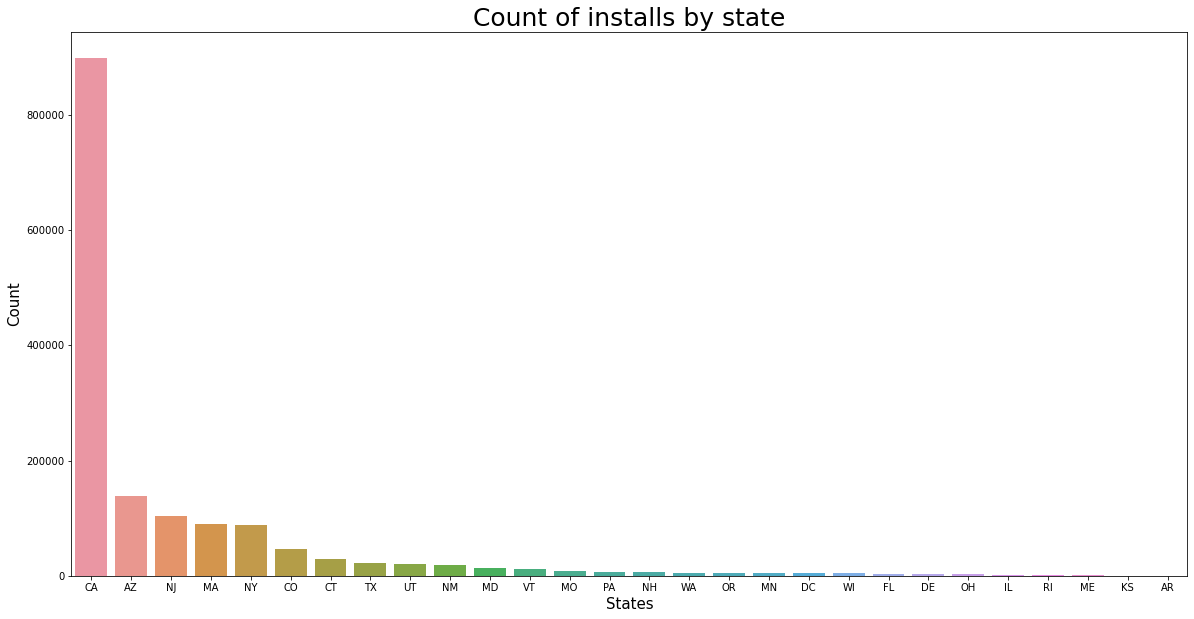

In [26]:
#Review amount of installs by State for all time
fig=plt.figure(figsize=(20,10))
plt.tight_layout()
ax = sns.countplot(x='State', data=df, order = df['State'].value_counts().index)
plt.title('Count of installs by state', fontsize=25)
plt.xlabel('States', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

ax.get_figure().savefig('number_of_install_by_state.png',dpi=600)

In [27]:
# function to plot for all segment data by year
def segment_year(df, state_name='', *args):
    segment_lst=['RES','COM','GOV','NON-PROFIT','SCHOOL','NON-RES']
    fig,ax=plt.subplots(figsize=(20,10))
    for i, seg in enumerate(segment_lst):  
        bool_arr=df['Customer Segment']==seg
        year_grouped=df[bool_arr].groupby(['year']).mean()
        
        ax.scatter(year_grouped.index,year_grouped['cost_per_KW'])
        ax.plot(year_grouped.index,year_grouped['cost_per_KW'], label=seg)
        ax.set_title('{} cost per size change by segment '.format(state_name), fontsize=25)
        ax.set_xticks(range(1998,2019))
        ax.set_xlabel('Year',fontsize=15)
        ax.set_ylabel('Cost per KW',fontsize=15)
        ax.legend()

Plot below demostrates that mean cost per KW does is not different for most of the segments. Also 94.4% of the segments are Resedential, so futher analysis is not going differentiate between segements.

In [28]:
#cumulative percentage in segments
df_rep['Customer Segment'].value_counts().cumsum()/1187660

RES           0.944009
COM           0.961766
NON-RES       0.972001
GOV           0.975557
NON-PROFIT    0.978000
SCHOOL        0.979582
Name: Customer Segment, dtype: float64

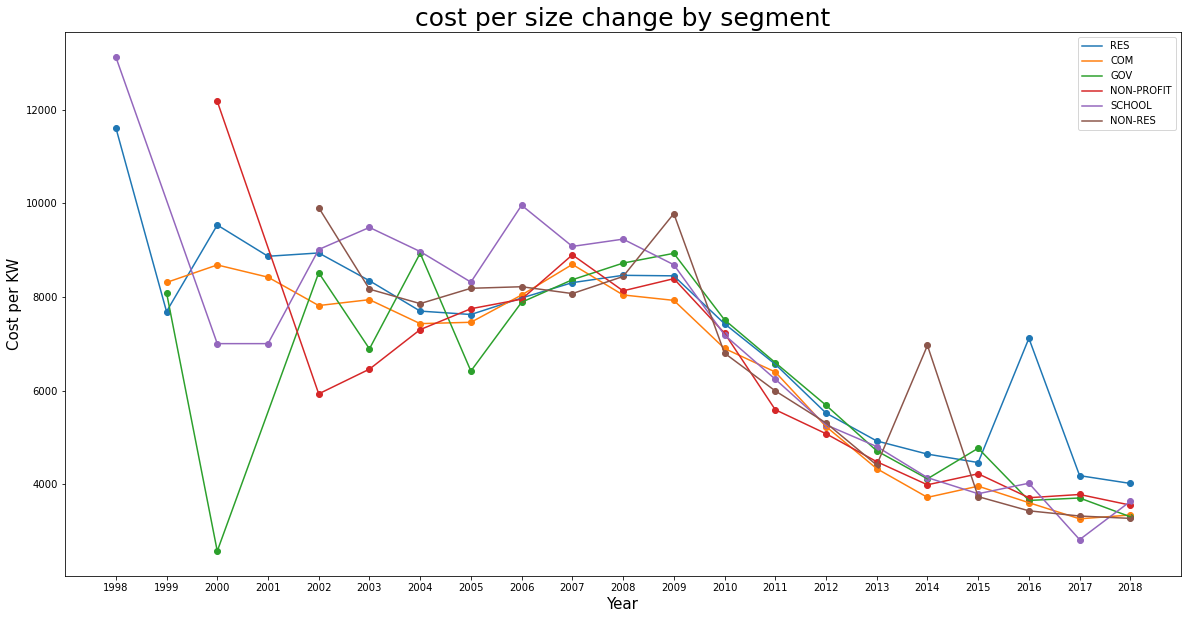

In [31]:
segment_year(df_rep)
plt.savefig('cost per size change by segment')

In [44]:
df_2017_2018=df_rep[df_rep['year']>=2017]

In [45]:
grouped_by_st=df_2017_2018.groupby(['State']).mean()

In [46]:
df_2017_2018_filtered=df_2017_2018[['State','cost_per_KW_with_rebate','Module Technology #1','Module Efficiency #1','year','cost_per_KW']]
df_2017_2018_filtered.columns
test=df_2017_2018_filtered.copy()
test['log_cost_per_kw']=test['cost_per_KW_with_rebate'].apply(np.log)
test['Module_Technology']=test['Module Technology #1']
test['Module_Efficiency']=test['Module Efficiency #1']

In [421]:
test['Module_Technology']

9734              Poly
45432             Poly
45470             Mono
45523             Poly
45560             Poly
              ...     
1543295    crystalline
1543296           Mono
1543297           Mono
1543298           Mono
1543299    crystalline
Name: Module_Technology, Length: 396390, dtype: object

In [47]:
test=test[test['log_cost_per_kw'].notna()]

In [424]:
test.shape

(396355, 9)

In [49]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [50]:
mod = smf.ols(formula='cost_per_KW_with_rebate~State', data=df_2017_2018_filtered)
res = mod.fit()
print(res.summary())

                               OLS Regression Results                              
Dep. Variable:     cost_per_KW_with_rebate   R-squared:                       0.000
Model:                                 OLS   Adj. R-squared:                  0.000
Method:                      Least Squares   F-statistic:                     1.074
Date:                     Fri, 30 Oct 2020   Prob (F-statistic):              0.374
Time:                             14:39:28   Log-Likelihood:            -5.0436e+06
No. Observations:                   396390   AIC:                         1.009e+07
Df Residuals:                       396373   BIC:                         1.009e+07
Df Model:                               16                                         
Covariance Type:                 nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------


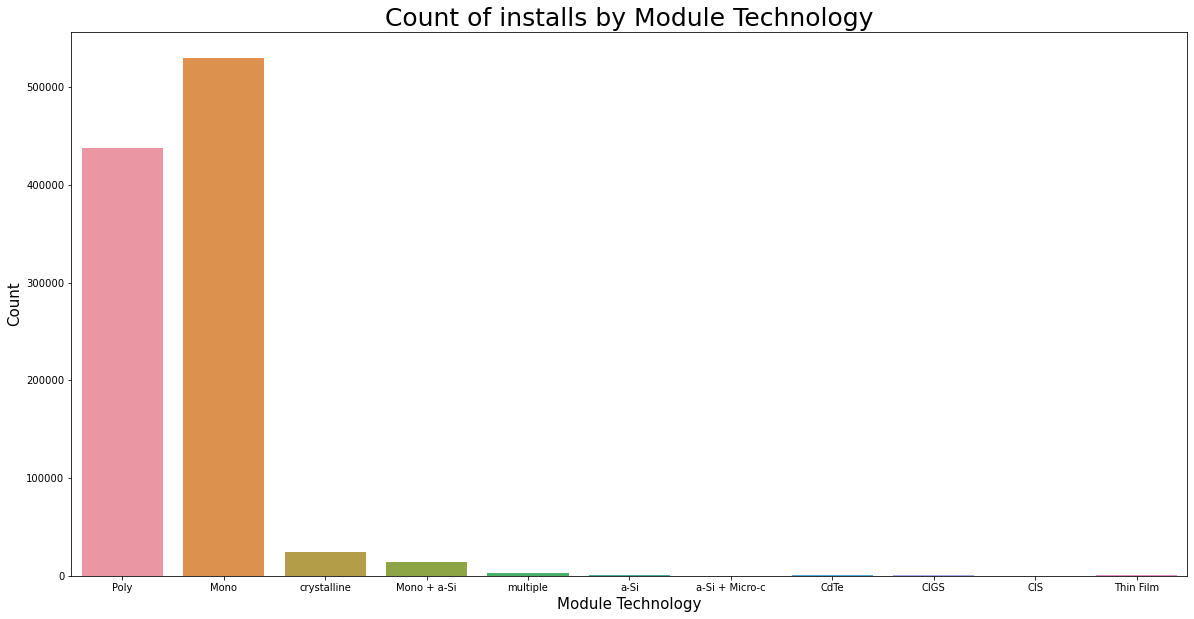

In [33]:
#Review amount of installs by technology type for alltime
plt.figure(figsize=(20,10))
plt.tight_layout()
ax = sns.countplot(x='Module Technology #1', data=df_rep)
plt.title('Count of installs by Module Technology', fontsize=25)
plt.xlabel('Module Technology', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

ax.get_figure().savefig('number_Module_Technology_1.png',dpi=600)

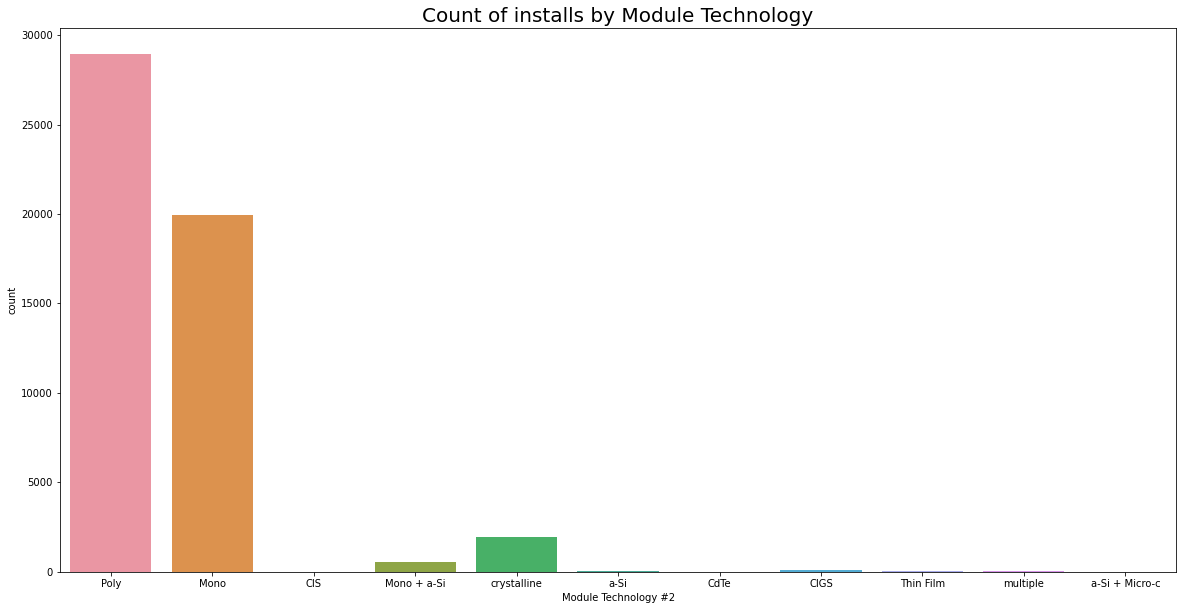

In [432]:
#Review amount of installs by technology type for alltime
plt.figure(figsize=(20,10))
plt.tight_layout()
ax = sns.countplot(x='Module Technology #2', data=df_rep)
plt.title('Count of installs by Module Technology', fontsize=20)
plt.show()

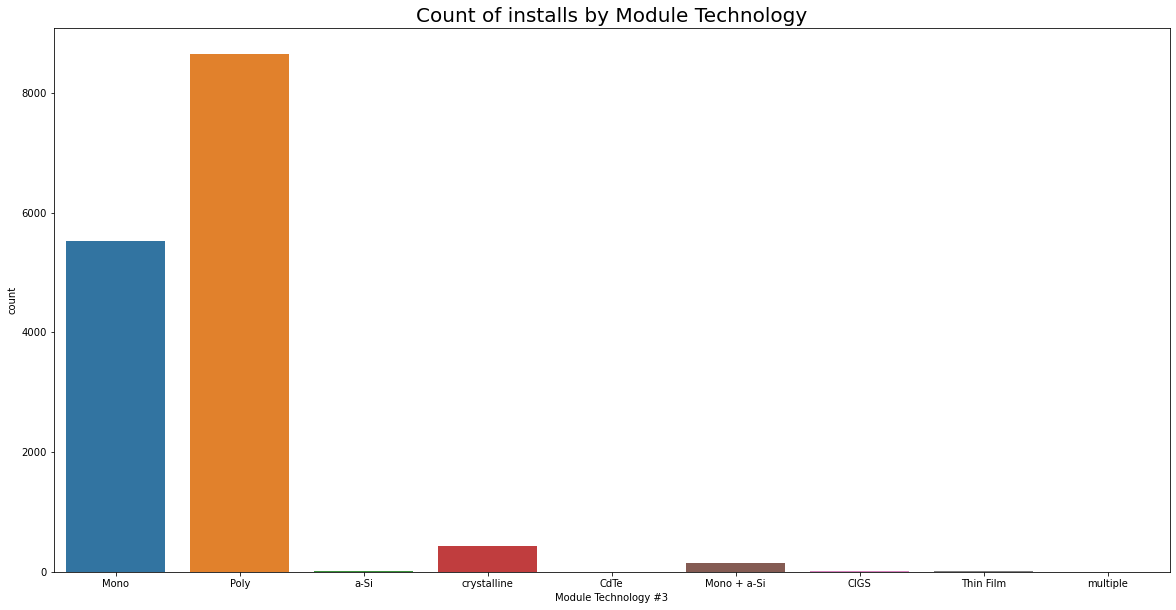

In [431]:
#Review amount of installs by technology type for alltime
plt.figure(figsize=(20,10))
plt.tight_layout()
ax = sns.countplot(x='Module Technology #3', data=df_rep)
plt.title('Count of installs by Module Technology', fontsize=20)
plt.show()

Mon - Monocrystalline Silicon Solar PV

Poly - Polycrystalline Silicon Solar PV

Thin Film - Thin Film Solar PV

CdTe - Thin Film Solar Cadmium telluride photovoltaics

CIGS - copper indium gallium diselenide

a-Si - amorphous thin-film silicon
      
CIS- Copper, Indium and Selenium

In [477]:
test_CIS=test[test['Module_Technology']=='CIS']['cost_per_KW_with_rebate']
test_CdTe=test[test['Module_Technology']=='CdTe']['cost_per_KW_with_rebate']
test_Mono=test[test['Module_Technology']=='Mono']['cost_per_KW_with_rebate']
test_MonoSci=test[test['Module_Technology']=='Mono + a-Si']['cost_per_KW_with_rebate']
test_Poly=test[test['Module_Technology']=='Poly']['cost_per_KW_with_rebate']
test_Thin_Film=test[test['Module_Technology']=='Thin Film']['cost_per_KW_with_rebate']
test_crystalline=test[test['Module_Technology']=='crystalline']['cost_per_KW_with_rebate']
test_multiple=test[test['Module_Technology']=='multiple']['cost_per_KW_with_rebate']

Distrubutions are the same-Null Hypothesis

Kruskal–Wallis test shows that null hypothesis can be rejected, as p-value is extremely low.

In [261]:
stats.kruskal(test_CIS,test_CdTe,test_Mono,test_MonoSci,test_Poly,test_Thin_Film,test_crystalline,test_multiple)

KruskalResult(statistic=3321.649427627919, pvalue=0.0)

In [275]:
stats.kruskal(test_Mono,test_Poly)

KruskalResult(statistic=2573.3884572930133, pvalue=0.0)

In [274]:
stats.mannwhitneyu(test_Mono,test_Poly)

MannwhitneyuResult(statistic=8090808178.5, pvalue=0.0)

In [389]:
tech_vs_cost=test[['Module_Technology','log_cost_per_kw','cost_per_KW_with_rebate','year','cost_per_KW']]
tech_vs_cost.columns

Index(['Module_Technology', 'log_cost_per_kw', 'cost_per_KW_with_rebate',
       'year', 'cost_per_KW'],
      dtype='object')

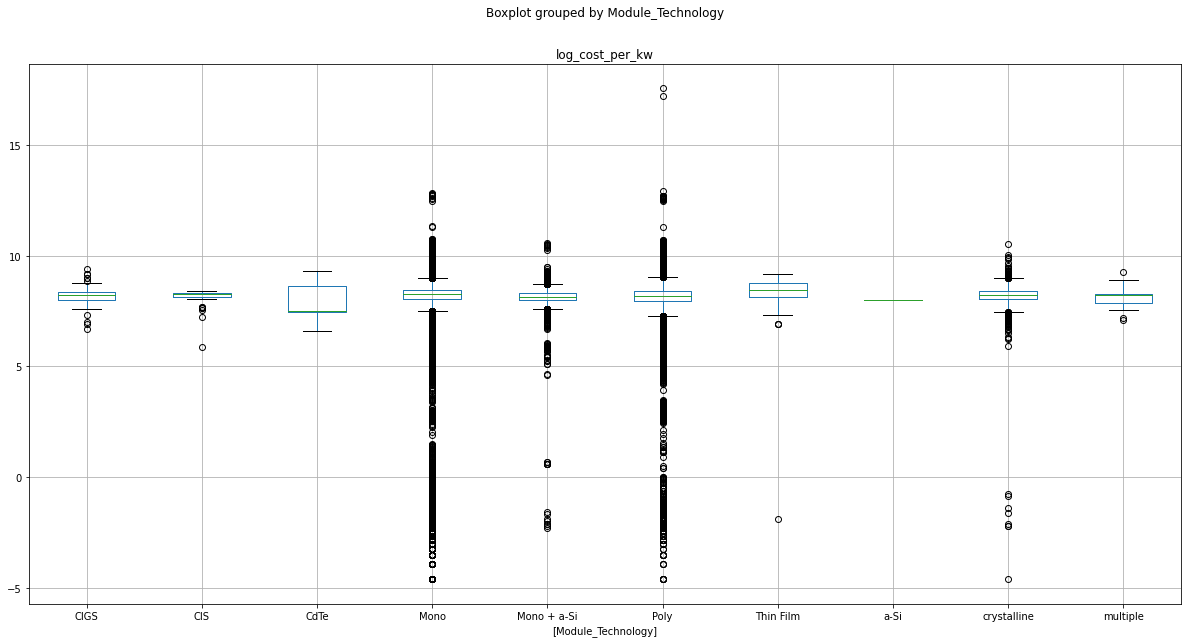

In [390]:
fig,ax=plt.subplots(figsize=(20,10))
tech_vs_cost[['log_cost_per_kw','Module_Technology']].boxplot(by='Module_Technology',ax=ax)
plt.show()

In [35]:
def percentile_75(x):
    return np.percentile(x,75)
def percentile_25(x):
    return np.percentile(x,25)
tech_vs_cost[tech_vs_cost['year']].groupby('Module_Technology')['cost_per_KW_with_rebate'].agg([np.median,percentile_25, percentile_75, 'count'])

NameError: name 'tech_vs_cost' is not defined

In [472]:
tech_vs_cost[tech_vs_cost['year']>2008].groupby('Module_Technology')['cost_per_KW_with_rebate'].agg([np.median,percentile_25, percentile_75, 'count'])

,median,percentile_25,percentile_75,count
Module_Technology,,,,
CIGS,3789.975,3035.5550,4190.135,76
CIS,3849.005,3432.3300,3997.225,36
CdTe,1830.000,1772.2450,5914.145,15
Mono,3877.150,3178.2350,4577.590,270635
Mono + a-Si,3448.000,3042.6450,4022.715,8651
Poly,3580.900,2828.5700,4400.000,68361
Thin Film,4736.120,3461.5100,6449.925,151
a-Si,3019.960,3019.9600,3019.960,1
crystalline,3700.000,3054.0175,4500.110,2454


Mon - Monocrystalline Silicon Solar PV

Poly - Polycrystalline Silicon Solar PV

Thin Film - Thin Film Solar PV

CdTe - Thin Film Solar Cadmium telluride photovoltaics

CIGS - copper indium gallium diselenide

a-Si - amorphous thin-film silicon
      
CIS- Copper, Indium and Selenium



In [400]:
def percentile_75(x):
    return np.percentile(x,75)
def percentile_25(x):
    return np.percentile(x,25)
tech_vs_cost.groupby('Module_Technology')['cost_per_KW_with_rebate'].agg([np.mean,percentile_25, percentile_75, 'count'])

,mean,percentile_25,percentile_75,count
Module_Technology,,,,
CIGS,3983.314868,3035.5550,4190.135,76
CIS,3476.333056,3432.3300,3997.225,36
CdTe,3983.207333,1772.2450,5914.145,15
Mono,3877.403944,3178.2350,4577.590,270635
Mono + a-Si,3627.950358,3042.6450,4022.715,8651
Poly,4784.156089,2828.5700,4400.000,68361
Thin Film,4818.495099,3461.5100,6449.925,151
a-Si,3019.960000,3019.9600,3019.960,1
crystalline,3933.841822,3054.0175,4500.110,2454


In [62]:
def percentile_75(x):
    return np.percentile(x,75)
def percentile_25(x):
    return np.percentile(x,25)
df_rep.groupby('Module Technology #1')['cost_per_KW_with_rebate'].agg([np.mean, np.median, percentile_25, percentile_75, 'count'])

,mean,median,percentile_25,percentile_75,count
Module Technology #1,,,,,
CIGS,4543.995769,4149.680,2901.1700,5627.3750,891
CIS,4126.262222,3984.200,3115.4500,5526.1100,81
CdTe,6728.226571,6539.185,5414.0800,8882.4975,630
Mono,4151.998150,4055.220,3298.2500,4931.4350,529920
Mono + a-Si,4559.878288,4021.065,3250.0600,5767.3200,14122
Poly,6154.772923,4522.500,3538.0000,5120.0000,438113
Thin Film,4913.078374,4993.580,3456.4800,6639.1325,406
a-Si,5651.991894,5270.290,3539.0025,6519.1000,322
a-Si + Micro-c,5141.099281,4766.200,3628.0200,6217.8300,139


In [52]:
df_rep_CIS=df_rep[df_rep['Module Technology #1']=='CIS']['cost_per_KW_with_rebate']
df_rep_CdTe=df_rep[df_rep['Module Technology #1']=='CdTe']['cost_per_KW_with_rebate']
df_rep_Mono=df_rep[df_rep['Module Technology #1']=='Mono']['cost_per_KW_with_rebate']
df_rep_MonoSci=df_rep[df_rep['Module Technology #1']=='Mono + a-Si']['cost_per_KW_with_rebate']
df_rep_Poly=df_rep[df_rep['Module Technology #1']=='Poly']['cost_per_KW_with_rebate']
df_rep_Thin_Film=df_rep[df_rep['Module Technology #1']=='Thin Film']['cost_per_KW_with_rebate']
df_rep_crystalline=df_rep[df_rep['Module Technology #1']=='crystalline']['cost_per_KW_with_rebate']
df_rep_multiple=df_rep[df_rep['Module Technology #1']=='multiple']['cost_per_KW_with_rebate']

In [59]:
stat, p = stats.kruskal(df_rep_CIS,df_rep_CdTe,df_rep_Mono,df_rep_MonoSci,df_rep_Poly, df_rep_Thin_Film, df_rep_crystalline, df_rep_multiple)
print('stat=%.0f, p-value=%.3f' % (stat, p))

stat=16444, p-value=0.000


In [60]:
stat, p = stats.kruskal(df_rep_Mono,df_rep_Poly)
print('stat=%.0f, p-value=%.3f' % (stat, p))

stat=15230, p-value=0.000


In [61]:
stat, p = stats.mannwhitneyu(df_rep_Mono,df_rep_Poly)
print('stat=%.0f, p-value=%.3f' % (stat, p))

stat=99194543972, p-value=0.000


In [34]:
df_rep.groupby('Module Technology #1')['Module Efficiency #1'].agg([np.mean,np.median, 'count'])

,mean,median,count
Module Technology #1,,,
CIGS,0.117233,0.128440,862
CIS,0.150983,0.152381,81
CdTe,0.104439,0.104167,627
Mono,0.181952,0.181847,496038
Mono + a-Si,0.186594,0.194611,14029
Poly,0.156783,0.158683,398734
Thin Film,0.153520,0.139860,406
a-Si,0.061981,0.062000,312
a-Si + Micro-c,0.092638,0.094156,35
